In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/cardekho_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         15411 non-null  int64  
 1   model                         15411 non-null  int64  
 2   vehicle_age                   15411 non-null  int64  
 3   km_driven                     15411 non-null  float64
 4   mileage                       15411 non-null  float64
 5   engine                        15411 non-null  float64
 6   max_power                     15411 non-null  float64
 7   seats                         15411 non-null  int64  
 8   selling_price                 15411 non-null  int64  
 9   seller_type_Individual        15411 non-null  uint8  
 10  seller_type_Trustmark Dealer  15411 non-null  uint8  
 11  fuel_type_Diesel              15411 non-null  uint8  
 12  fuel_type_Electric            15411 non-null  uint8  
 13  f

In [ ]:
  df.shape

(15411, 16)

In [ ]:
df.isnull().sum()

brand                           0
model                           0
vehicle_age                     0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
seats                           0
selling_price                   0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
fuel_type_Diesel                0
fuel_type_Electric              0
fuel_type_LPG                   0
fuel_type_Petrol                0
transmission_type_Manual        0
dtype: int64

In [ ]:
cat_feat=[feature for feature in df.columns if df[feature].dtype =='O']
num_feat=[feature for feature in df.columns if df[feature].dtype != 'O']               #     or numerical_columns=df.columns[df.dtypes!='object']
                                                                                       #        categorical_columns=df.columns[df.dtypes=='object']

In [ ]:
cat_feat

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [ ]:
num_feat

['Unnamed: 0',
 'vehicle_age',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'selling_price']

In [ ]:
print('We have {} cat_feat : {}'.format(len(cat_feat), cat_feat))
print('\nWe have {} num_feat : {}'.format(len(num_feat), num_feat))

We have 6 cat_feat : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

We have 8 num_feat : ['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [ ]:
for col in cat_feat:
    print(df[col].value_counts(normalize=True)*100)
    print("-----------------------------------------")              #normalize=True: This parameter in the value_counts()
                                                                    #function normalizes the counts to calculate the relative frequency
                                                                    #(percentage) of each unique value instead of the absolute count.

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
-----------------------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.848615
Tata              2.790215
Mercedes-Benz     2.186750
Skoda             2.167283
Audi              1.245863
Datsun            1.103108
Jaguar            0.382843
Land Rover        0.330932
Jeep              0.266044
Kia               0.207644
Porsche           0.136266
Volvo             0.129777
MG                0.123289
Mini  

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)


In [ ]:
plt.figure(figsize=(25,28))
plt.suptitle('Univariate Analysis of cat Features',fontsize=20,fontweight='bold')
for kk in range(0,len(cat_feat)):
    plt.subplot(6,1,kk+1)
    sns.countplot(x=df[cat_feat[kk]])
    plt.xlabel(cat_feat[kk])
    plt.xticks(rotation=45)

    plt.tight_layout()

check multicolinear

In [ ]:
df.corr()

In [ ]:
df[num_feat].corr()


<Axes: >

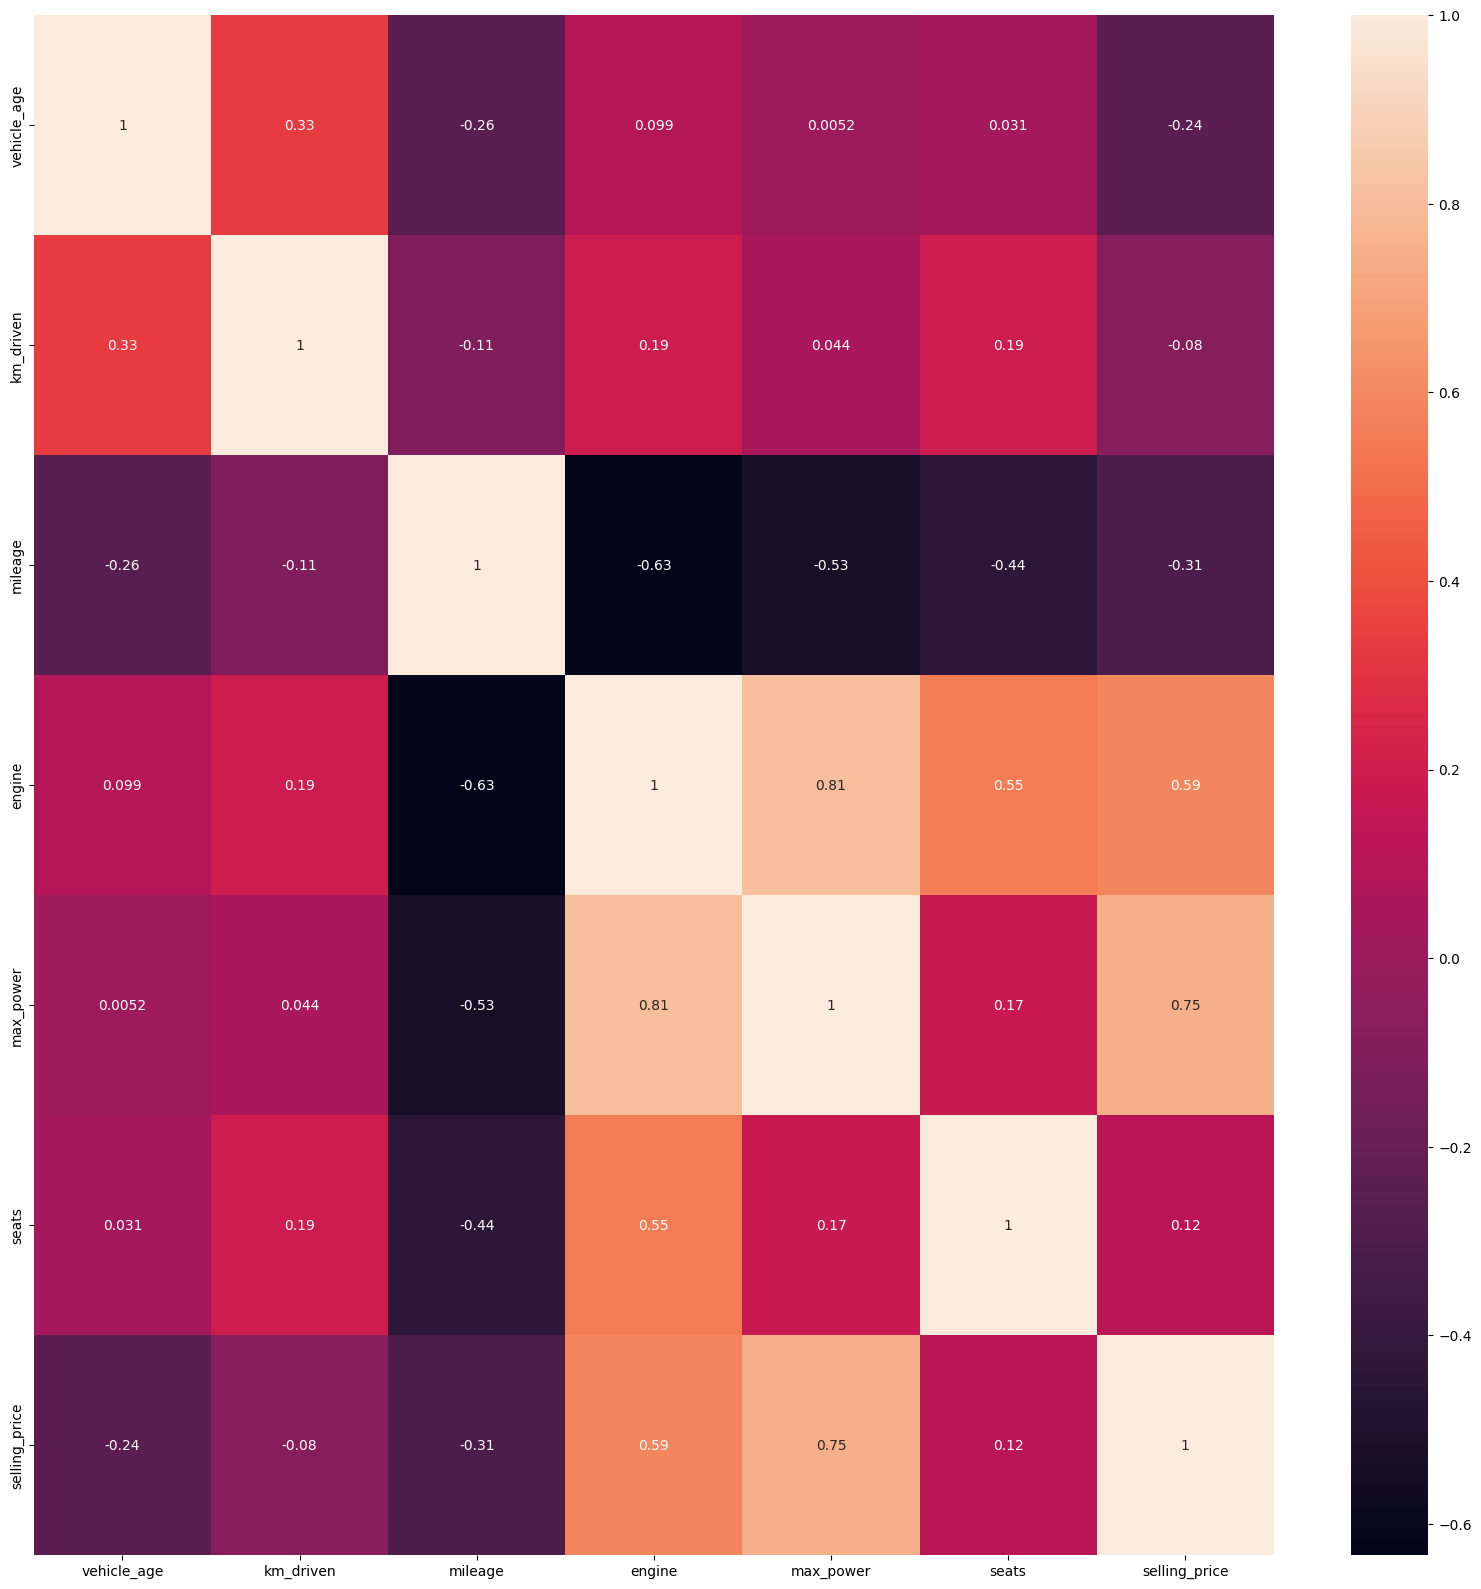

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

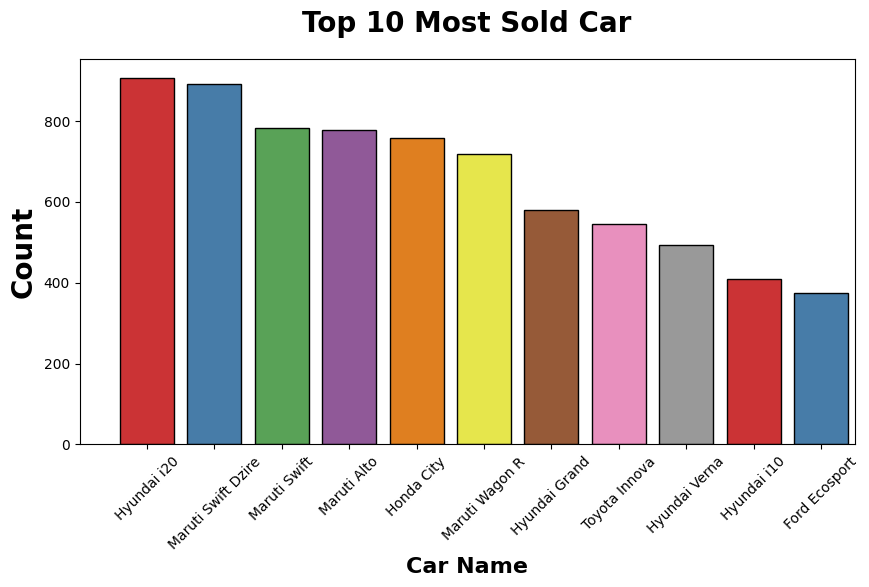

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [ ]:
df.loc[df['fuel_type']=='Electric']

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1997,Toyota Camry,Toyota,Camry,6,49500,Dealer,Electric,Automatic,19.16,2494,157.7,5,1850000
11630,Toyota Camry,Toyota,Camry,6,60000,Individual,Electric,Automatic,19.16,2494,157.7,5,2000000
14323,Toyota Camry,Toyota,Camry,5,85000,Dealer,Electric,Automatic,19.16,2494,157.7,5,1865000
14600,Toyota Camry,Toyota,Camry,6,64000,Dealer,Electric,Automatic,19.16,2494,157.7,5,1699000


In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [ ]:
df['brand'].value_counts()

Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: brand, dtype: int64

In [ ]:
brand = df.groupby('brand').selling_price.max()
brand_df = brand.to_frame().sort_values('selling_price')
brand_df

,selling_price
brand,
Datsun,650000
Force,700000
Renault,1155000
Maruti,1225000
Volkswagen,1250000
Nissan,1450000
Tata,1750000
ISUZU,1900000
MG,2075000


In [ ]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)
mileage.to_frame()                                                                  #the DataFrame df is grouped by the 'brand' column using the groupby() function.
                                                                                    #Then, the mean() function is applied to the 'mileage' column within each group,
                                                                                    #giving the average mileage for each brand. The result is a Series object with
                                                                                    #the brand names as the index and the corresponding average mileage as the values.

,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


In [ ]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
df=pd.get_dummies(df,columns=['seller_type','fuel_type','transmission_type'],drop_first=True)

In [ ]:
df['vehicle_age'].max()


29

In [ ]:
df['vehicle_age'].min()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['brand']=le.fit_transform(df['brand'])
df['model']=le.fit_transform(df['model'])



In [ ]:
df.head()

,brand,model,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,18,7,9,0.031553,19.70,0.000517,46.30,5,120000,1,0,0,0,0,1,1
1,8,54,5,0.005237,18.90,0.069667,82.00,5,550000,1,0,0,0,0,1,1
2,8,118,11,0.015764,17.00,0.069667,80.00,5,215000,1,0,0,0,0,1,1
3,18,7,9,0.009711,20.92,0.035351,67.10,5,226000,1,0,0,0,0,1,1
4,6,38,6,0.007869,22.77,0.121573,98.59,5,570000,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
e=MinMaxScaler()
df[['km_driven','engine']]=e.fit_transform(df[['km_driven','engine']])

In [ ]:
df.head(10)

,brand,model,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,Maruti,Alto,9,120000,19.70,796,46.30,5,120000,1,0,0,0,0,1,1
1,Hyundai,Grand,5,20000,18.90,1197,82.00,5,550000,1,0,0,0,0,1,1
2,Hyundai,i20,11,60000,17.00,1197,80.00,5,215000,1,0,0,0,0,1,1
3,Maruti,Alto,9,37000,20.92,998,67.10,5,226000,1,0,0,0,0,1,1
4,Ford,Ecosport,6,30000,22.77,1498,98.59,5,570000,0,0,1,0,0,0,1
5,Maruti,Wagon R,8,35000,18.90,998,67.10,5,350000,1,0,0,0,0,1,1
6,Hyundai,i10,8,40000,20.36,1197,78.90,5,315000,0,0,0,0,0,1,1
7,Maruti,Wagon R,3,17512,20.51,998,67.04,5,410000,0,0,0,0,0,1,1
8,Hyundai,Venue,2,20000,18.15,998,118.35,5,1050000,1,0,0,0,0,1,0
9,Maruti,Swift,4,28321,16.60,1197,85.00,5,511000,0,0,0,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         15411 non-null  object 
 1   model                         15411 non-null  object 
 2   vehicle_age                   15411 non-null  int64  
 3   km_driven                     15411 non-null  int64  
 4   mileage                       15411 non-null  float64
 5   engine                        15411 non-null  int64  
 6   max_power                     15411 non-null  float64
 7   seats                         15411 non-null  int64  
 8   selling_price                 15411 non-null  int64  
 9   seller_type_Individual        15411 non-null  uint8  
 10  seller_type_Trustmark Dealer  15411 non-null  uint8  
 11  fuel_type_Diesel              15411 non-null  uint8  
 12  fuel_type_Electric            15411 non-null  uint8  
 13  f

In [ ]:
df.head()

,brand,model,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,18,7,9,0.031553,19.70,0.000517,46.30,5,120000,1,0,0,0,0,1,1
1,8,54,5,0.005237,18.90,0.069667,82.00,5,550000,1,0,0,0,0,1,1
2,8,118,11,0.015764,17.00,0.069667,80.00,5,215000,1,0,0,0,0,1,1
3,18,7,9,0.009711,20.92,0.035351,67.10,5,226000,1,0,0,0,0,1,1
4,6,38,6,0.007869,22.77,0.121573,98.59,5,570000,0,0,1,0,0,0,1


In [ ]:
X= df.iloc[:, 0:8].join(df.iloc[:, 9:])     #or  #X = pd.concat([df.iloc[:, :8], df.iloc[:, 9:]], axis=1)          OR         X = df.iloc[:, 0:8].join(df.iloc[:, 9:])
X

                                            #or X = df.drop(labels=[]'selling_price'],axis=1)

,brand,model,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,18,7,9,0.031553,19.70,0.000517,46.30,5,1,0,0,0,0,1,1
1,8,54,5,0.005237,18.90,0.069667,82.00,5,1,0,0,0,0,1,1
2,8,118,11,0.015764,17.00,0.069667,80.00,5,1,0,0,0,0,1,1
3,18,7,9,0.009711,20.92,0.035351,67.10,5,1,0,0,0,0,1,1
4,6,38,6,0.007869,22.77,0.121573,98.59,5,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,8,117,9,0.002796,19.81,0.050526,68.05,5,0,0,0,0,0,1,1
15407,18,42,2,0.004711,17.50,0.100017,91.10,7,0,0,0,0,0,1,1
15408,27,77,6,0.017606,21.14,0.121573,103.52,5,0,0,1,0,0,0,1
15409,17,114,5,1.000000,16.00,0.239007,140.00,7,0,0,1,0,0,0,1


In [ ]:
y=df['selling_price']
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.3,random_state=42)